In [1]:
import pandas as pd

ri = pd.read_csv('RI-clean.csv')

ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

ri.set_index('stop_datetime', inplace=True)

/anaconda2/envs/myvenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
# Calculate the overall arrest rate
ri.is_arrested.mean()

0.03454755048024903

In [3]:
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

In [4]:
ri.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
           dtype='int64', name='stop_datetime', length=480584)

In [5]:
print(ri.groupby(ri.index.hour).is_arrested.mean())

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64


In [6]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

In [7]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

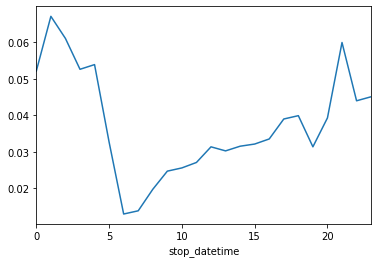

In [8]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

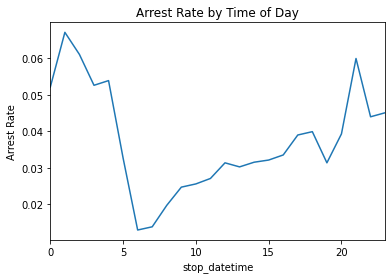

In [9]:
# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
hourly_arrest_rate.plot()

In [10]:
# Calculate the annual rate of drug-related stops
ri.drugs_related_stop.resample('A').mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [11]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

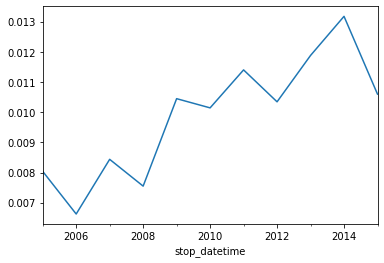

In [12]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()
plt.show()

In [13]:
# Calculate and save the annual search rate
ri['search_conducted'] = ri.search_conducted.astype('bool')

In [14]:
annual_search_rate = ri.search_conducted.resample('A').mean()

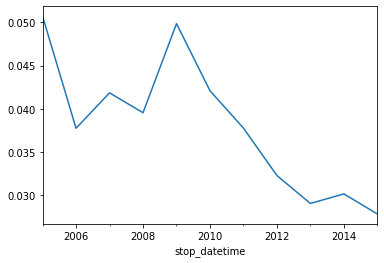

In [15]:
annual_search_rate.plot()

In [16]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

/anaconda2/envs/myvenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda2/envs/myvenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda2/envs/myvenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda2/envs/myvenv/lib/python3.8/site

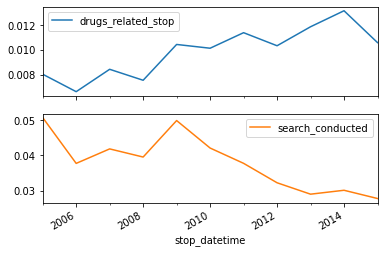

In [17]:
# Create subplots from 'annual'
annual.plot(subplots=True)
# Display the subplots
plt.show()

In [21]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1         3786              7127   1501                  628          1   
Zone K2        11285             16440   5103                 4056       2897   
Zone K3        12959             16218   3926                 3871       3660   
Zone X1         1725              3711    752                  192        451   
Zone X3        11520             17178   4069                 3532       4445   
Zone X4        19975             29554   8865                 7551       4870   

violation  Speeding  
district             
Zone K1       33067  
Zone K2       57500  
Zone K3       68234  
Zone X1        6393  
Zone X3       48687  
Zone X4       54855  


In [23]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

In [29]:
# Select rows 'Zone K1' through 'Zone K3'
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [30]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

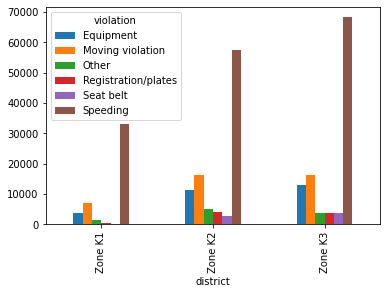

In [33]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')
plt.show()

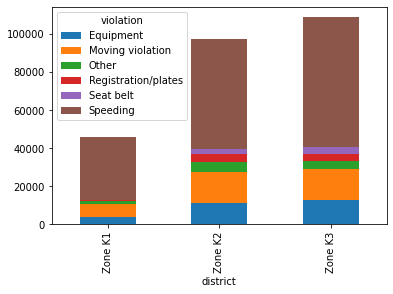

In [34]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)
plt.show()

In [38]:
# Print the unique values in 'stop_duration'
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [40]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

In [42]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_duration'] = ri.stop_duration.map(mapping)

In [43]:
ri.stop_duration.dtype

dtype('float64')

In [45]:
# Print the unique values in 'stop_minutes'
print(ri.stop_duration.unique())

[ 8. 23. 45. nan]


In [59]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
ri.groupby('violation_raw').stop_duration.mean()

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_duration, dtype: float64

In [60]:
# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_duration.mean()

In [62]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values()

violation_raw
Seatbelt Violation                   9.698236
Speeding                            10.589215
Equipment/Inspection Violation      11.454326
Violation of City/Town Ordinance    13.230695
Registration Violation              13.543268
Other Traffic Violation             13.834359
Special Detail/Directed Patrol      14.876778
Motorist Assist/Courtesy            17.629929
Suspicious Person                   18.374269
APB                                 18.593814
Warrant                             19.769231
Call for Service                    21.963314
Name: stop_duration, dtype: float64

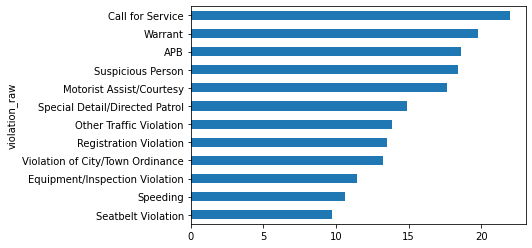

In [65]:
stop_length.sort_values().plot(kind='barh')
plt.show()